In [1]:
import itk
import matplotlib.pyplot as plt

# Chemins des fichiers d'image
fixed_filepath = '../Data/case6_gre1.nrrd'
moving_filepath = '../Data/case6_gre2.nrrd'
output_filepath = 'output_transformed_image.nrrd'

# Définir le type d'image
PixelType = itk.F
Dimension = 3
ImageType = itk.Image[PixelType, Dimension]

# Charger les images
fixed_image = itk.imread(fixed_filepath, PixelType)
moving_image = itk.imread(moving_filepath, PixelType)

# Définir la transformation affine
TransformType = itk.AffineTransform[itk.D, Dimension]
initial_transform = TransformType.New()

# Définir le type d'optimiseur et métrique
OptimizerType = itk.RegularStepGradientDescentOptimizerv4[itk.D]
optimizer = OptimizerType.New()

MetricType = itk.MeanSquaresImageToImageMetricv4[ImageType, ImageType]
metric = MetricType.New()

# Configurer le processus de recalage
RegistrationType = itk.ImageRegistrationMethodv4[ImageType, ImageType]
registration = RegistrationType.New()
registration.SetMetric(metric)
registration.SetOptimizer(optimizer)
registration.SetFixedImage(fixed_image)
registration.SetMovingImage(moving_image)
registration.SetInitialTransform(initial_transform)
#registration.SetInterpolator(interpolator)

# Initialisation de l'optimiseur
optimizer.SetLearningRate(4.00)
optimizer.SetMinimumStepLength(0.001)
optimizer.SetNumberOfIterations(200)

# Démarrer le recalage
registration.Update()


Iterations = 145
Metric value = 62413.70071285869


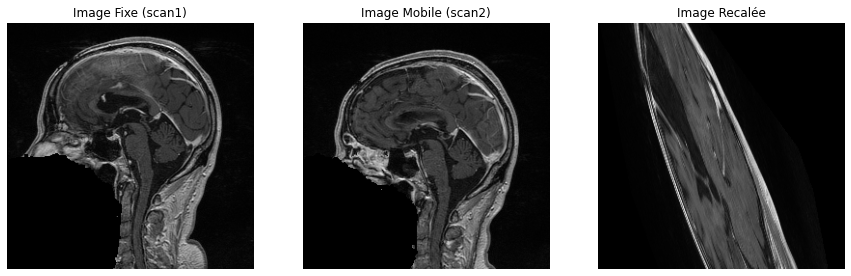

In [2]:
# Afficher les informations sur le recalage
number_of_iterations = optimizer.GetCurrentIteration()
best_value = optimizer.GetValue()
print(f"Iterations = {number_of_iterations}")
print(f"Metric value = {best_value}")


# Récupérer la transformation finale
final_transform = registration.GetTransform()

# Appliquer la transformation à l'image mobile
resampler = itk.ResampleImageFilter.New(Input=moving_image, Transform=final_transform, UseReferenceImage=True, ReferenceImage=fixed_image)
resampler.SetDefaultPixelValue(0)
resampler.Update()
transformed_image = resampler.GetOutput()

# Sauvegarder l'image recalée
itk.imwrite(transformed_image, output_filepath)

# Optionnel : afficher les résultats
fixed_array = itk.array_from_image(fixed_image)
moving_array = itk.array_from_image(moving_image)
transformed_array = itk.array_from_image(transformed_image)

slice_index = fixed_array.shape[0] // 2

# Visualiser les images avant et après le recalage
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(fixed_array[slice_index, :, :], cmap='gray')
axes[0].set_title('Image Fixe (scan1)')
axes[0].axis('off')

axes[1].imshow(moving_array[slice_index, :, :], cmap='gray')
axes[1].set_title('Image Mobile (scan2)')
axes[1].axis('off')

axes[2].imshow(transformed_array[slice_index, :, :], cmap='gray')
axes[2].set_title('Image Recalée')
axes[2].axis('off')

plt.show()
